In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from hurst import compute_Hc
from time import time
from sklearn.feature_selection import mutual_info_regression
import scipy.stats
import seaborn as sns

In [2]:
def read_dataset(name='data/factor_capacidad.csv',data='solar_pv'):
    df = pd.read_csv(name,index_col=0,parse_dates=True)
    # df.index.freq = 'H'
    return df[data]
df_spv = read_dataset(data='solar_pv')
df_st = read_dataset(data='solar_th')
df_w = read_dataset(data='wind')

## Statistical info

In [22]:
def get_moments(s):
    print('Mean: ',s.mean())
    print('Std Dev: ',s.std())
    print('Skew: ', scipy.stats.skew(s))
    print('Kurtosis: ', scipy.stats.kurtosis(s))

Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199


Traceback (most recent call last):
  File "/home/fcelaya/tfm/venv/lib/python3.10/site-packages/IPython/core/completer.py", line 3168, in _complete
    matcher(text), type=_UNKNOWN_TYPE
  File "/home/fcelaya/tfm/venv/lib/python3.10/site-packages/IPython/core/completer.py", line 2339, in python_matches
    matches = self.global_matches(text)
  File "/home/fcelaya/tfm/venv/lib/python3.10/site-packages/IPython/core/completer.py", line 1113, in global_matches
    for word in lst:
RuntimeError: dictionary changed size during iteration


Text(0.5, 0, '')

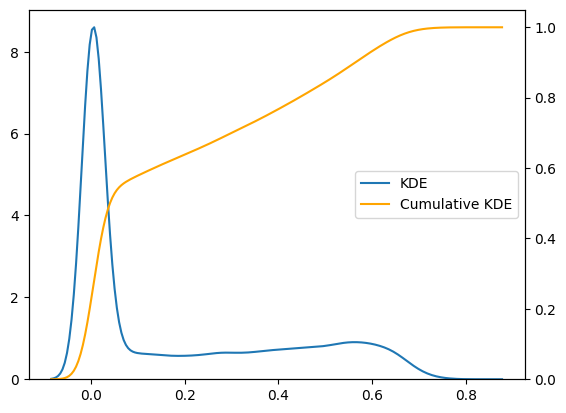

In [51]:
get_moments(df_spv)
get_moments(df_st)
get_moments(df_w)

Text(0.5, 1.0, 'Wind')

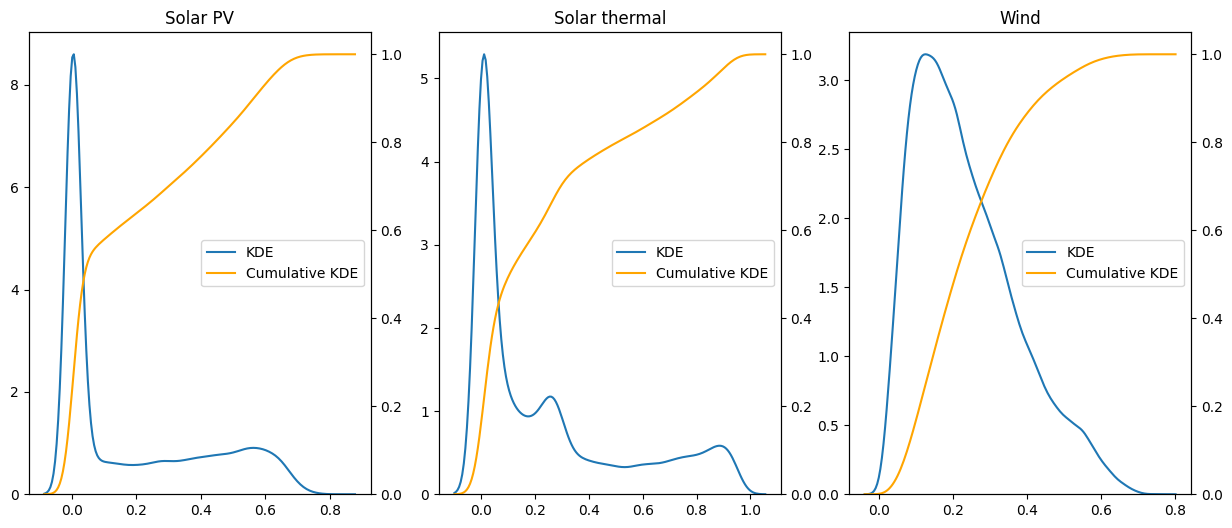

In [61]:
fig, ax = plt.subplots(1,3,figsize=(15,6))

sns.kdeplot(df_spv,ax=ax[0],label='KDE')
sns.lineplot([0],ax=ax[0],color='orange',label='Cumulative KDE')
ax2 = ax[0].twinx()
sns.kdeplot(df_spv,ax=ax2,cumulative=True,color='orange',label='Cumulative KDE')
ax[0].legend(loc='center right')
# ax2.legend(loc='upper right')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax2.set_ylabel('')

sns.kdeplot(df_st,ax=ax[1],label='KDE')
sns.lineplot([0],ax=ax[1],color='orange',label='Cumulative KDE')
ax3 = ax[1].twinx()
sns.kdeplot(df_st,ax=ax3,cumulative=True,color='orange',label='Cumulative KDE')
ax[1].legend(loc='center right')
# ax2.legend(loc='upper right')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax3.set_ylabel('')

sns.kdeplot(df_w,ax=ax[2],label='KDE')
sns.lineplot([0],ax=ax[2],color='orange',label='Cumulative KDE')
ax4 = ax[2].twinx()
sns.kdeplot(df_w,ax=ax4,cumulative=True,color='orange',label='Cumulative KDE')
ax[2].legend(loc='center right')
# ax2.legend(loc='upper right')
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax4.set_ylabel('')

ax[0].set_title('Solar PV')
ax[1].set_title('Solar thermal')
ax[2].set_title('Wind')

## Seasonal decomposition

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [32]:
# sd_solar = seasonal_decompose(df_spv, model='additive', period=24*365)
# fig = sd_solar.plot()
# fig.set_size_inches(15,12)
# fig.show()

In [33]:
# sd_solar = seasonal_decompose(df_st, model='additive', period=24*365)
# fig = sd_solar.plot()
# fig.set_size_inches(15,12)
# fig.show()

In [35]:
# sd_solar = seasonal_decompose(df_w, model='additive', period=24*365)
# fig = sd_solar.plot()
# fig.set_size_inches(15,12)
# fig.show()

## Granger causality

In [5]:
aux = pd.DataFrame(df_w)
aux = aux.merge(df_spv, how='inner', left_index=True,right_index=True)
a = grangercausalitytests(aux,[1,2,3,4,5,6,8,10,12,15,18,21,24,28,32,36,40,44,48],verbose=False)

/home/fcelaya/tfm/venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [6]:
a[1]

({'ssr_ftest': (7277.019142818621, 0.0, 74469.0, 1),
  'ssr_chi2test': (7277.312299131026, 0.0, 1),
  'lrtest': (6943.335978426272, 0.0, 1),
  'params_ftest': (7277.01914281861, 0.0, 74469.0, 1.0)},
  array([[0., 1., 0.]])])

In [7]:
a[48]

({'ssr_ftest': (26.274271073282428, 1.8695716475152257e-230, 74328.0, 48),
  'ssr_chi2test': (1262.8108651140099, 6.234332098294179e-233, 48),
  'lrtest': (1252.2171191964298, 1.0260808769160422e-230, 48),
  'params_ftest': (26.274271073241962,
   1.8695716492461977e-230,
   74328.0,
   48.0)},
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.]])])

## ACF PACF

In [3]:
import seaborn as sns
s_eolica = read_dataset(data='eolica')

<Axes: xlabel='eolica', ylabel='Density'>

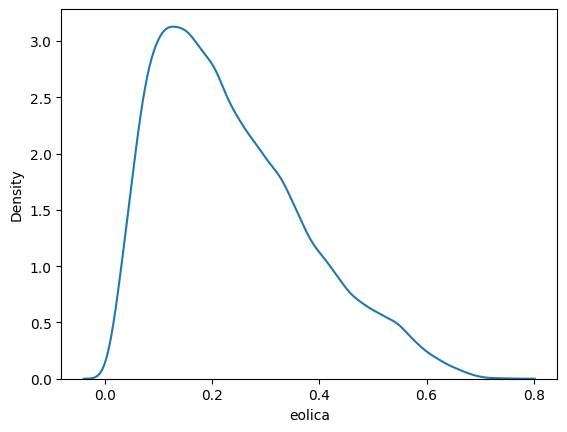

In [10]:
sns.kdeplot(s_eolica)

<Axes: xlabel='eolica', ylabel='Density'>

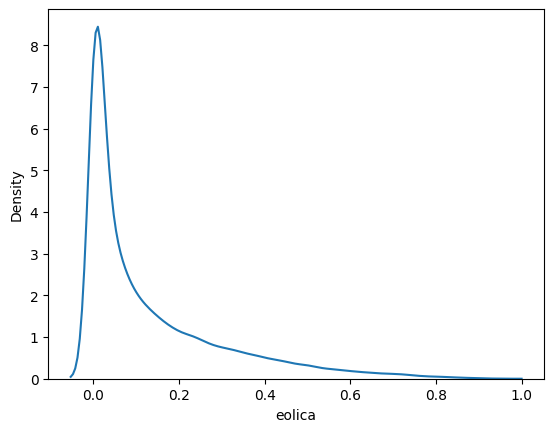

In [17]:
sns.kdeplot((s_eolica-1)**12)

(array([ 8602., 18474., 16921., 13076.,  9742.,  6007.,  3739.,  2290.,
          693.,    63.]),
 array([0.00453212, 0.07988661, 0.15524109, 0.23059558, 0.30595006,
        0.38130455, 0.45665903, 0.53201352, 0.607368  , 0.68272249,
        0.75807697]),
 <BarContainer object of 10 artists>)

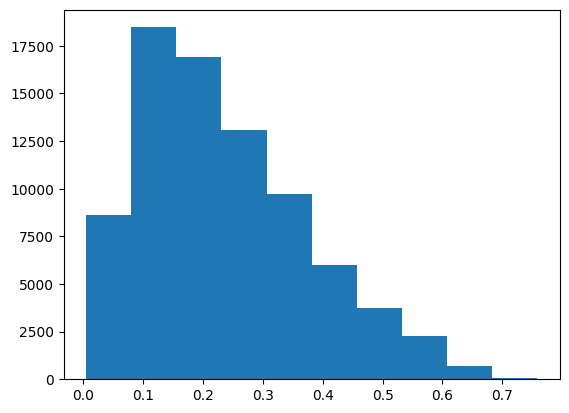

In [4]:
plt.hist(s_eolica)

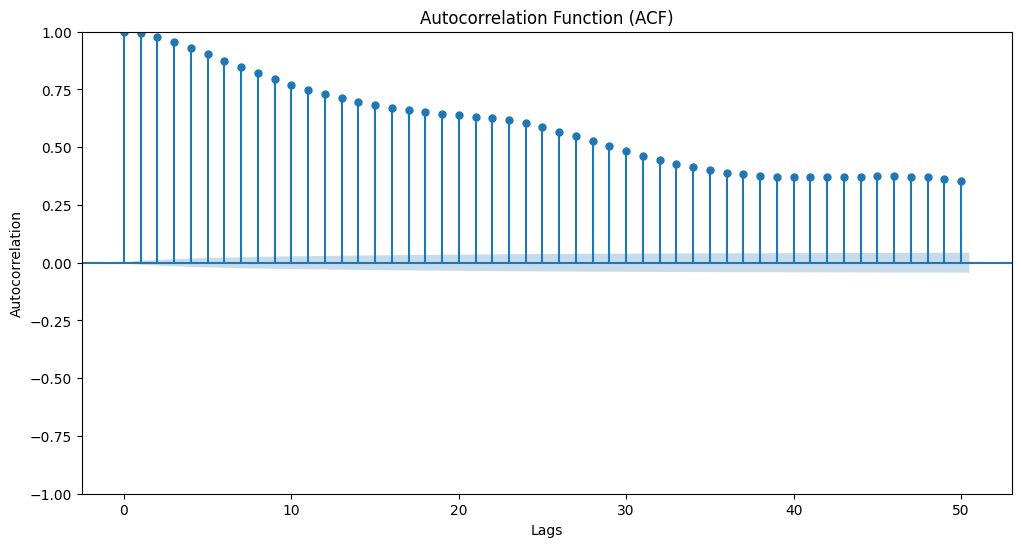

In [4]:
plt.figure(figsize=(12, 6))
plot_acf(Y_df, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

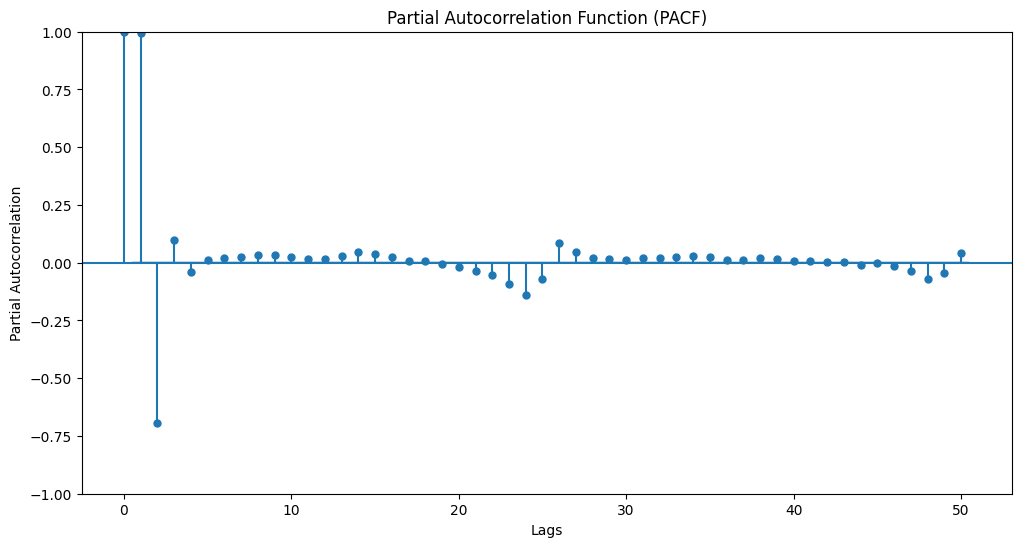

In [5]:
plt.figure(figsize=(12, 6))
plot_pacf(Y_df, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

## Lagged correlation v2

In [12]:
def new_corr_coef_series(s_x, s_y):
    """
    s_x: pd.Series, np.array
    """
    assert len(s_x)==len(s_y)
    n = len(s_x)
    df = pd.DataFrame({'x':s_x, 'y':s_y})
    # df = df.dropna()
    df = df.sort_values(by='x', ascending=True)
    rank = df['y'].rank(method='min')
    coef = 1 - 3*sum(abs(rank-rank.shift(1))[1:])/(n**2-1)
    return coef

def new_corr_coef(df, x='x', y='y'):
    """
    s_x: pd.Series, np.array
    """
    n = len(df)
    df = df.sort_values(by=x, ascending=True)
    rank = df[y].rank(method='min')
    coef = 1 - 3*sum(abs(rank-rank.shift(1))[1:])/(n**2-1)
    return coef

In [13]:
def calc_lcf(series_org, series_lag, n_lags=24*3):
    assert len(series_org) == len(series_lag)
    rhos = []
    xis = []
    mis = []
    for lag in range(n_lags + 1):
        shifted_series = series_lag.shift(lag)
        rho = series_org.corr(shifted_series)
        df = pd.DataFrame({'x':shifted_series, 'y':series_org})
        df = df.dropna()
        xi = new_corr_coef(df)
        rhos.append(rho)
        xis.append(xi)
    return rhos, xis, mis

In [8]:
s_w = read_dataset(data='wind')
s_spv = read_dataset(data='solar_pv')
s_st = read_dataset(data='solar_th')
t1 = time()
spv2spv = calc_lcf(s_spv, s_spv)
print(f"spv2spv: {time()-t1:.1f}")
t1 = time()
w2w = calc_lcf(s_w, s_w)
print(f"w2w: {time()-t1:.1f}")
t1 = time()
st2st = calc_lcf(s_st, s_st)
print(f"st2st: {time()-t1:.1f}")

spv2spv: 3.9
w2w: 3.5
st2st: 2.6


Text(0.5, 0, 'hours')

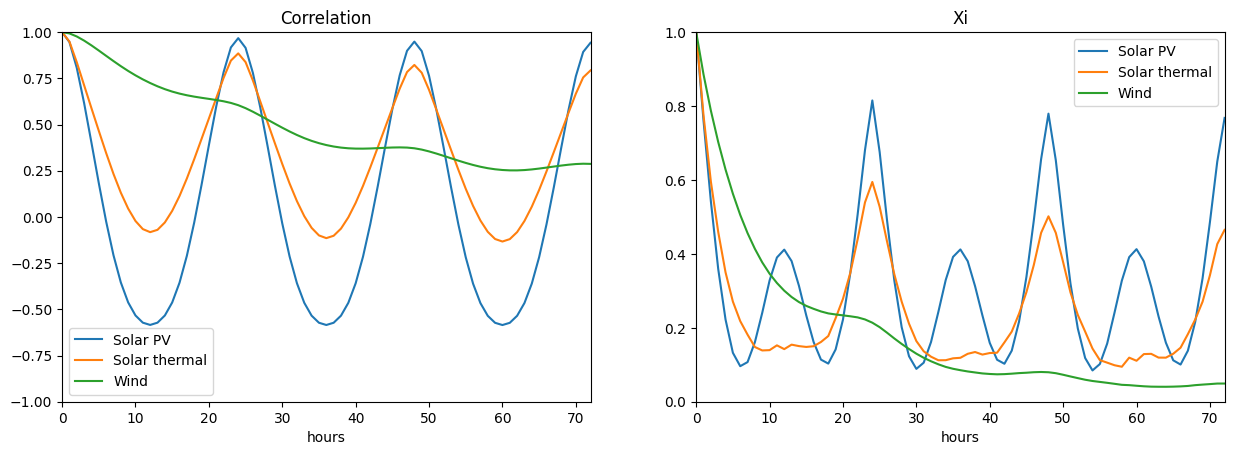

In [14]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Correlation')
ax[1].set_title('Xi')
fig.set_figwidth(15)
for i in range(2):
    ax[i].plot(spv2spv[i])
    ax[i].plot(st2st[i])
    ax[i].plot(w2w[i])
    ax[i].legend(['Solar PV', 'Solar thermal', 'Wind'])
ax[0].set_ylim([-1,1])
ax[1].set_ylim([0,1])
ax[0].set_xlim([0,len(spv2spv[0])-1])
ax[1].set_xlim([0,len(spv2spv[0])-1])
ax[0].set_xlabel('hours')
ax[1].set_xlabel('hours')

## Hurst

In [10]:
H, c, data = compute_Hc(df_st, kind='change', simplified=True)
H

-0.056975359837221365

## Seasonal breakdown

Solar PV Winter
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar PV Spring
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar PV Summer
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar PV Autumn
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar Thermal Winter
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar Thermal Spring
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar Thermal Summer
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar Thermal Autumn
Mean:  0.18060725918866904
Std Dev:  0.228355760994557

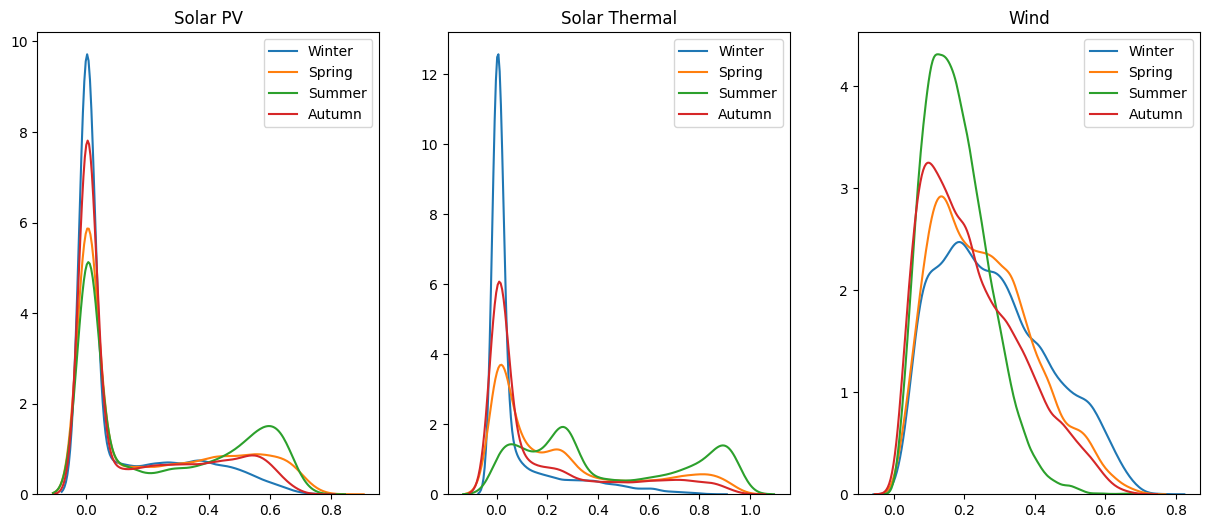

In [24]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
seasons = [(12,1,2),(3,4,5),(6,7,8),(9,10,11)]
seasons_names = ['Winter','Spring','Summer','Autumn']
dfs = [df_spv, df_st, df_w]
dfs_names = ['Solar PV', 'Solar Thermal', 'Wind']
for i,df in enumerate(dfs):
    for j,s in enumerate(seasons):
        print(dfs_names[i],seasons_names[j])
        get_moments(df_spv)
        sub_df = df[df.index.month.isin(s)]
        ax1 = ax[i]
        sns.kdeplot(sub_df,ax=ax1,label=seasons_names[j])
        ax1.set_ylabel('')
        ax1.set_xlabel('')
        ax1.set_title(dfs_names[i])
        ax1.legend()

Solar PV Night
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar PV Day
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar Thermal Night
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Solar Thermal Day
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Wind Night
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199
Wind Day
Mean:  0.18060725918866904
Std Dev:  0.22835576099455765
Skew:  0.8791765904168554
Kurtosis:  -0.7860636007861199


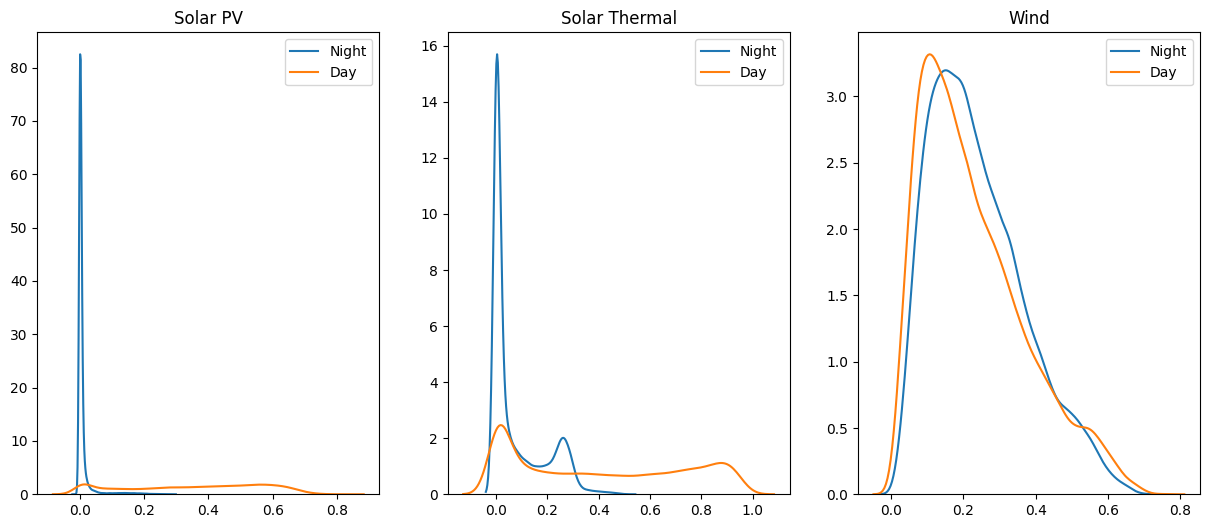

In [25]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
seasons = [(19,20,21,22,23,0,1,2,3,4,5,6),(7,8,9,10,11,12,13,14,15,16,17,18)]
seasons_names = ['Night','Day']
dfs = [df_spv, df_st, df_w]
dfs_names = ['Solar PV', 'Solar Thermal', 'Wind']
for i,df in enumerate(dfs):
    for j,s in enumerate(seasons):
        print(dfs_names[i],seasons_names[j])
        get_moments(df_spv)
        sub_df = df[df.index.hour.isin(s)]
        ax1 = ax[i]
        sns.kdeplot(sub_df,ax=ax1,label=seasons_names[j])
        ax1.set_ylabel('')
        ax1.set_xlabel('')
        ax1.set_title(dfs_names[i])
        ax1.legend()

## Seasonal lagged correlation

In [15]:
s_w = read_dataset(data='wind')
s_spv = read_dataset(data='solar_pv')
s_st = read_dataset(data='solar_th')

In [17]:
t1 = time()
spv2st = calc_lcf(s_spv, s_st)
print(f"spv2st: {time()-t1:.1f}")
t1 = time()
spv2w = calc_lcf(s_spv, s_w)
print(f"spv2w: {time()-t1:.1f}")
t1 = time()
st2spv = calc_lcf(s_st, s_spv)
print(f"st2spv: {time()-t1:.1f}")
t1 = time()
st2w = calc_lcf(s_st, s_w)
print(f"st2w: {time()-t1:.1f}")
t1 = time()
w2spv = calc_lcf(s_w, s_spv)
print(f"w2spv: {time()-t1:.1f}")
t1 = time()
w2st = calc_lcf(s_w,s_st)
print(f"w2st: {time()-t1:.1f}")

spv2st: 5.7
spv2w: 4.7
st2spv: 5.6
st2w: 4.2
w2spv: 4.7
w2st: 4.5


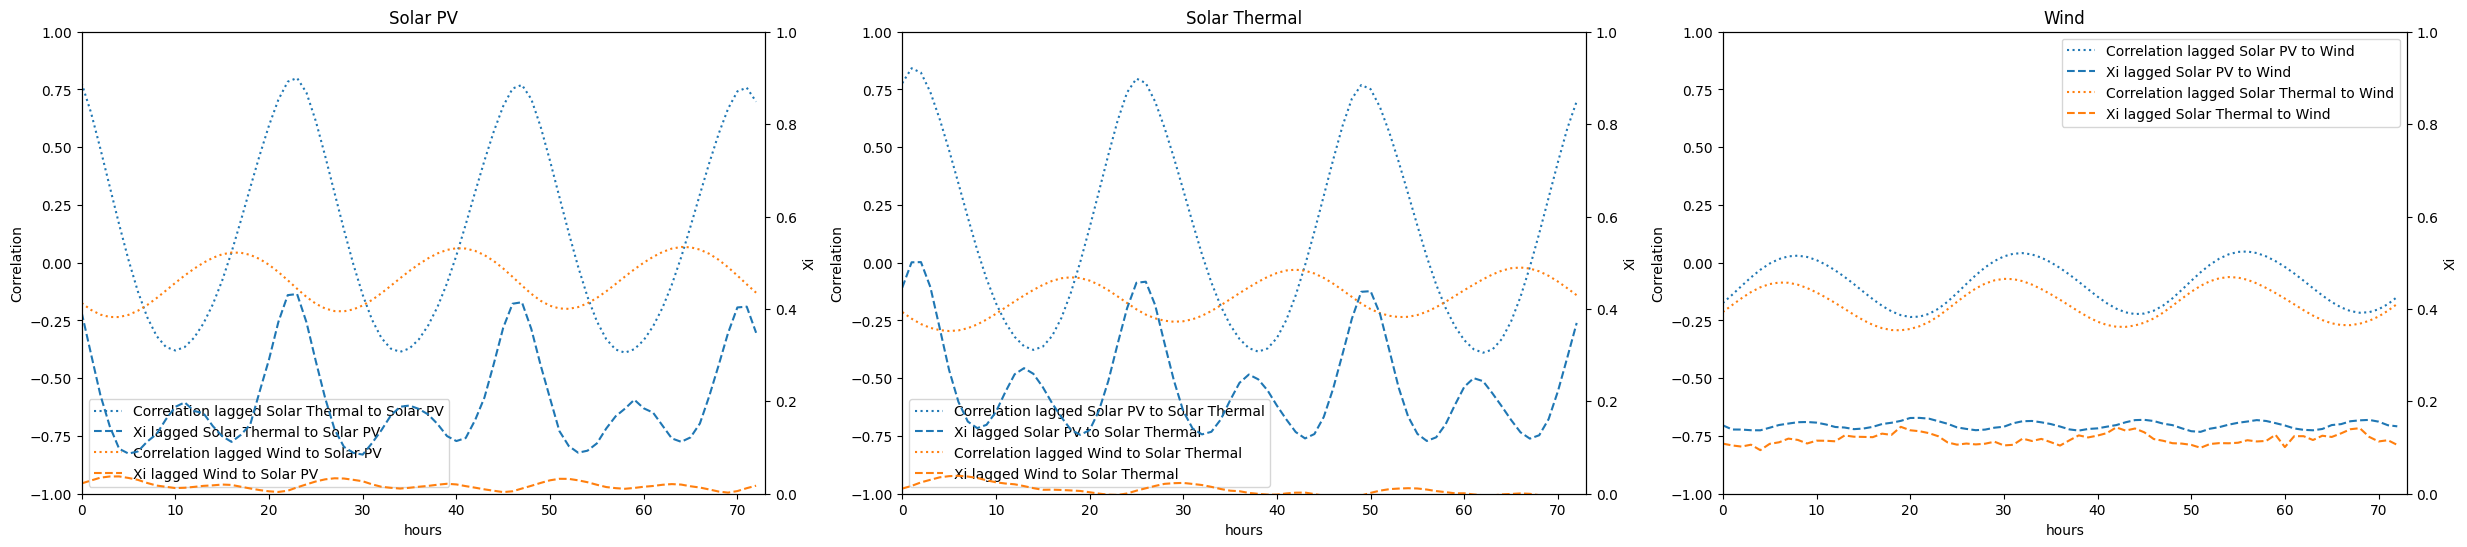

In [26]:
relationships = {
    (0,1):spv2st,
    (0,2):spv2w,
    (1,0):st2spv,
    (1,2):st2w,
    (2,0):w2spv,
    (2,1):w2st,
}
names = ['Solar PV', 'Solar Thermal', 'Wind']

fig, general_ax = plt.subplots(1,3,figsize=(30,6))
for n1 in range(3):
    ax = general_ax[n1]
    ax.set_title(f'{names[n1]}')
    ax.set_xlabel('hours')
    ax.set_ylabel('Correlation')
    ax2 = ax.twinx()
    ax2.set_ylabel('Xi')
    ax.set_xlim((0,len(relationships[0,1][0])))
    ax.set_ylim([-1,1])
    ax2.set_ylim([0,1])
    lines = []
    for n2 in range(3):
        if n1==n2: continue
        label = f'Correlation lagged {names[n2]} to {names[n1]}'
        l = ax.plot(relationships[n1,n2][0], label=label, linestyle=':')
        lines.append(l[0])
        label = f'Xi lagged {names[n2]} to {names[n1]}'
        l = ax2.plot(relationships[n1,n2][1], label=label, linestyle='--')
        lines.append(l[0])
    labels = [line.get_label() for line in lines]
    ax.legend(lines, labels)

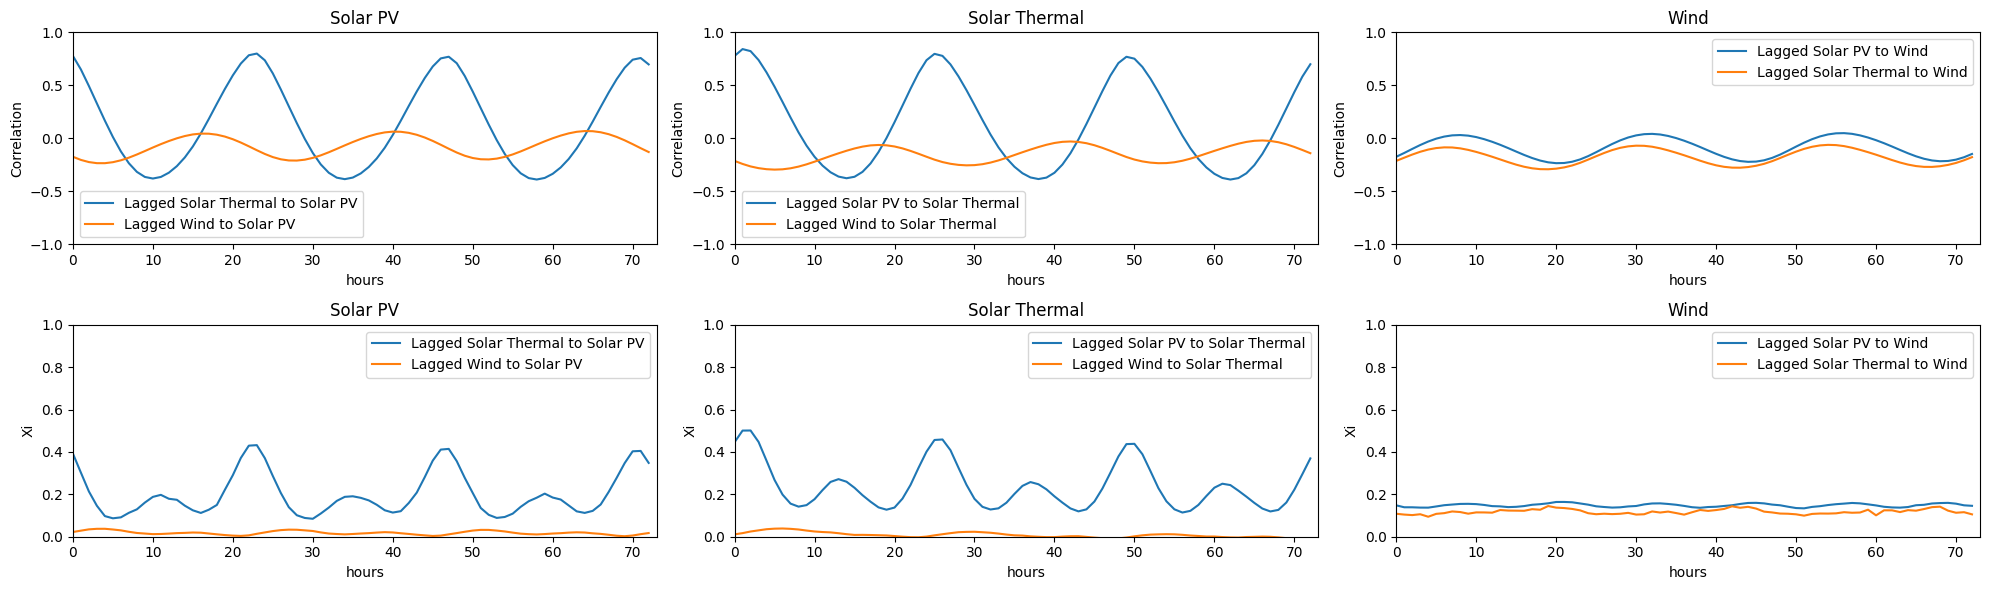

In [31]:
relationships = {
    (0,1):spv2st,
    (0,2):spv2w,
    (1,0):st2spv,
    (1,2):st2w,
    (2,0):w2spv,
    (2,1):w2st,
}
names = ['Solar PV', 'Solar Thermal', 'Wind']
c_names = ['Correlation', 'Xi']
limits = [(-1,1),(0,1)]
fig, general_ax = plt.subplots(2,3,figsize=(20,6))
for n1 in range(3):
    for c in range(2):
        ax = general_ax[c,n1]
        ax.set_title(f'{names[n1]}')
        ax.set_xlabel('hours')
        ax.set_ylabel(c_names[c])
        ax.set_xlim((0,len(relationships[0,1][0])))
        ax.set_ylim(limits[c])
        lines = []
        for n2 in range(3):
            if n1==n2: continue
            label = f'Lagged {names[n2]} to {names[n1]}'
            l = ax.plot(relationships[n1,n2][c], label=label)
            lines.append(l[0])
        labels = [line.get_label() for line in lines]
        ax.legend(lines, labels)
fig.tight_layout()

## Lagged correlation v1

In [8]:
def calc_lcf(series_org, series_lag, n_lags=24*3):
    assert len(series_org) == len(series_lag)
    rhos = []
    xis = []
    mis = []
    for lag in range(n_lags + 1):
        shifted_series = series_lag.shift(lag)
        rho = series_org.corr(shifted_series)
        df = pd.DataFrame({'x':shifted_series, 'y':series_org})
        df = df.dropna()
        xi = new_corr_coef(df)
        mi = mutual_info_regression(df[['x']], df['y'])
        rhos.append(rho)
        xis.append(xi)
        mis.append(mi)
    return rhos, xis, mis

s_eolica = read_dataset(data='eolica')
s_solar = read_dataset(data='solar')
t1 = time()
solar2solar = calc_lcf(s_solar, s_solar)
print(f"solar2solar: {time()-t1:.1f}")
t1 = time()
solar2eolica = calc_lcf(s_solar, s_eolica)
print(f"solar2eolica: {time()-t1:.1f}")
t1 = time()
eolica2eolica = calc_lcf(s_eolica, s_eolica)
print(f"eolica2eolica: {time()-t1:.1f}")
t1 = time()
eolica2solar = calc_lcf(s_eolica, s_solar)
print(f"eolica2solar: {time()-t1:.1f}")

solar2solar: 82.2
solar2eolica: 96.8
eolica2eolica: 103.7
eolica2solar: 99.5


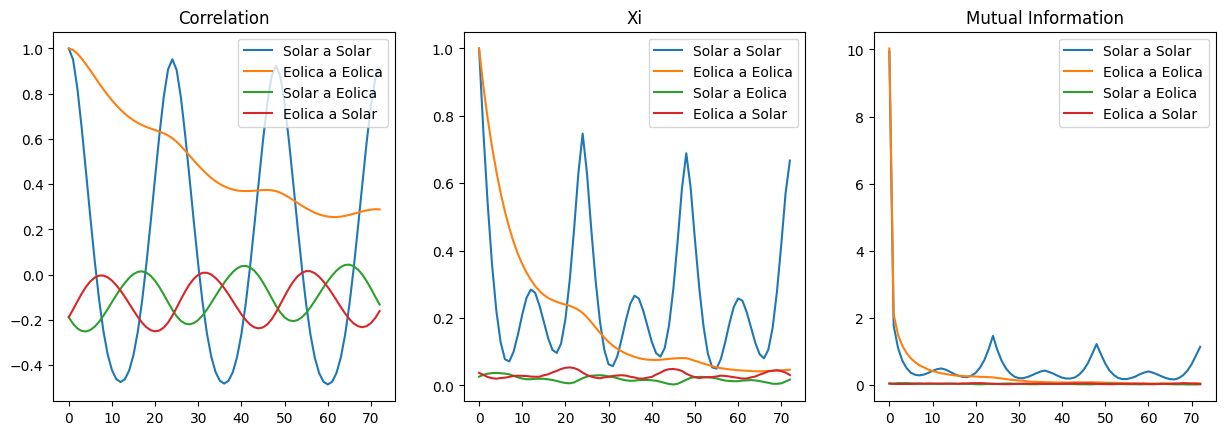

In [9]:
fig, ax = plt.subplots(1,3)
ax[0].set_title('Correlation')
ax[1].set_title('Xi')
ax[2].set_title('Mutual Information')
fig.set_figwidth(15)
for i in range(3):
    ax[i].plot(solar2solar[i])
    ax[i].plot(eolica2eolica[i])
    ax[i].plot(solar2eolica[i])
    ax[i].plot(eolica2solar[i])
    ax[i].legend(['Solar a Solar', 'Eolica a Eolica', 'Solar a Eolica', 'Eolica a Solar'])

plt.show()

### Lagged correlation hourly

In [29]:
def calc_lcf(series_org, series_lag, n_lags=30*2, hour=0):
    assert len(series_org) == len(series_lag)
    series_org = series_org[series_org.index.hour==hour]
    series_lag = series_lag[series_lag.index.hour==hour]
    rhos = []
    xis = []
    mis = []
    for lag in range(n_lags + 1):
        shifted_series = series_lag.shift(lag)
        rho = series_org.corr(shifted_series)
        df = pd.DataFrame({'x':shifted_series, 'y':series_org})
        df = df.dropna()
        xi = new_corr_coef(df)
        mi = mutual_info_regression(df[['x']], df['y'])
        rhos.append(rho)
        xis.append(xi)
        mis.append(mi)
    return rhos, xis, mis


solar2solar = []
solar2eolica = []
eolica2eolica = []
eolica2solar = []
for i in range(24):
    t1 = time()
    solar2solar.append(calc_lcf(s_solar, s_solar, hour=i))
    solar2eolica.append(calc_lcf(s_solar, s_eolica, hour=i))
    eolica2eolica.append(calc_lcf(s_eolica, s_eolica, hour=i))
    eolica2solar.append(calc_lcf(s_eolica, s_solar, hour=i))
    print(f"Hora {i}: {time()-t1:.1f}")

Hora 0: 39.5
Hora 1: 25.3
Hora 2: 36.6
Hora 3: 45.5
Hora 4: 40.8
Hora 5: 34.9
Hora 6: 36.4
Hora 7: 50.8
Hora 8: 67.4
Hora 9: 37.1
Hora 10: 27.0
Hora 11: 40.4
Hora 12: 72.0
Hora 13: 29.5
Hora 14: 26.8
Hora 15: 28.0
Hora 16: 29.4
Hora 17: 29.5
Hora 18: 27.6
Hora 19: 31.8
Hora 20: 40.6
Hora 21: 36.8
Hora 22: 39.5
Hora 23: 25.2


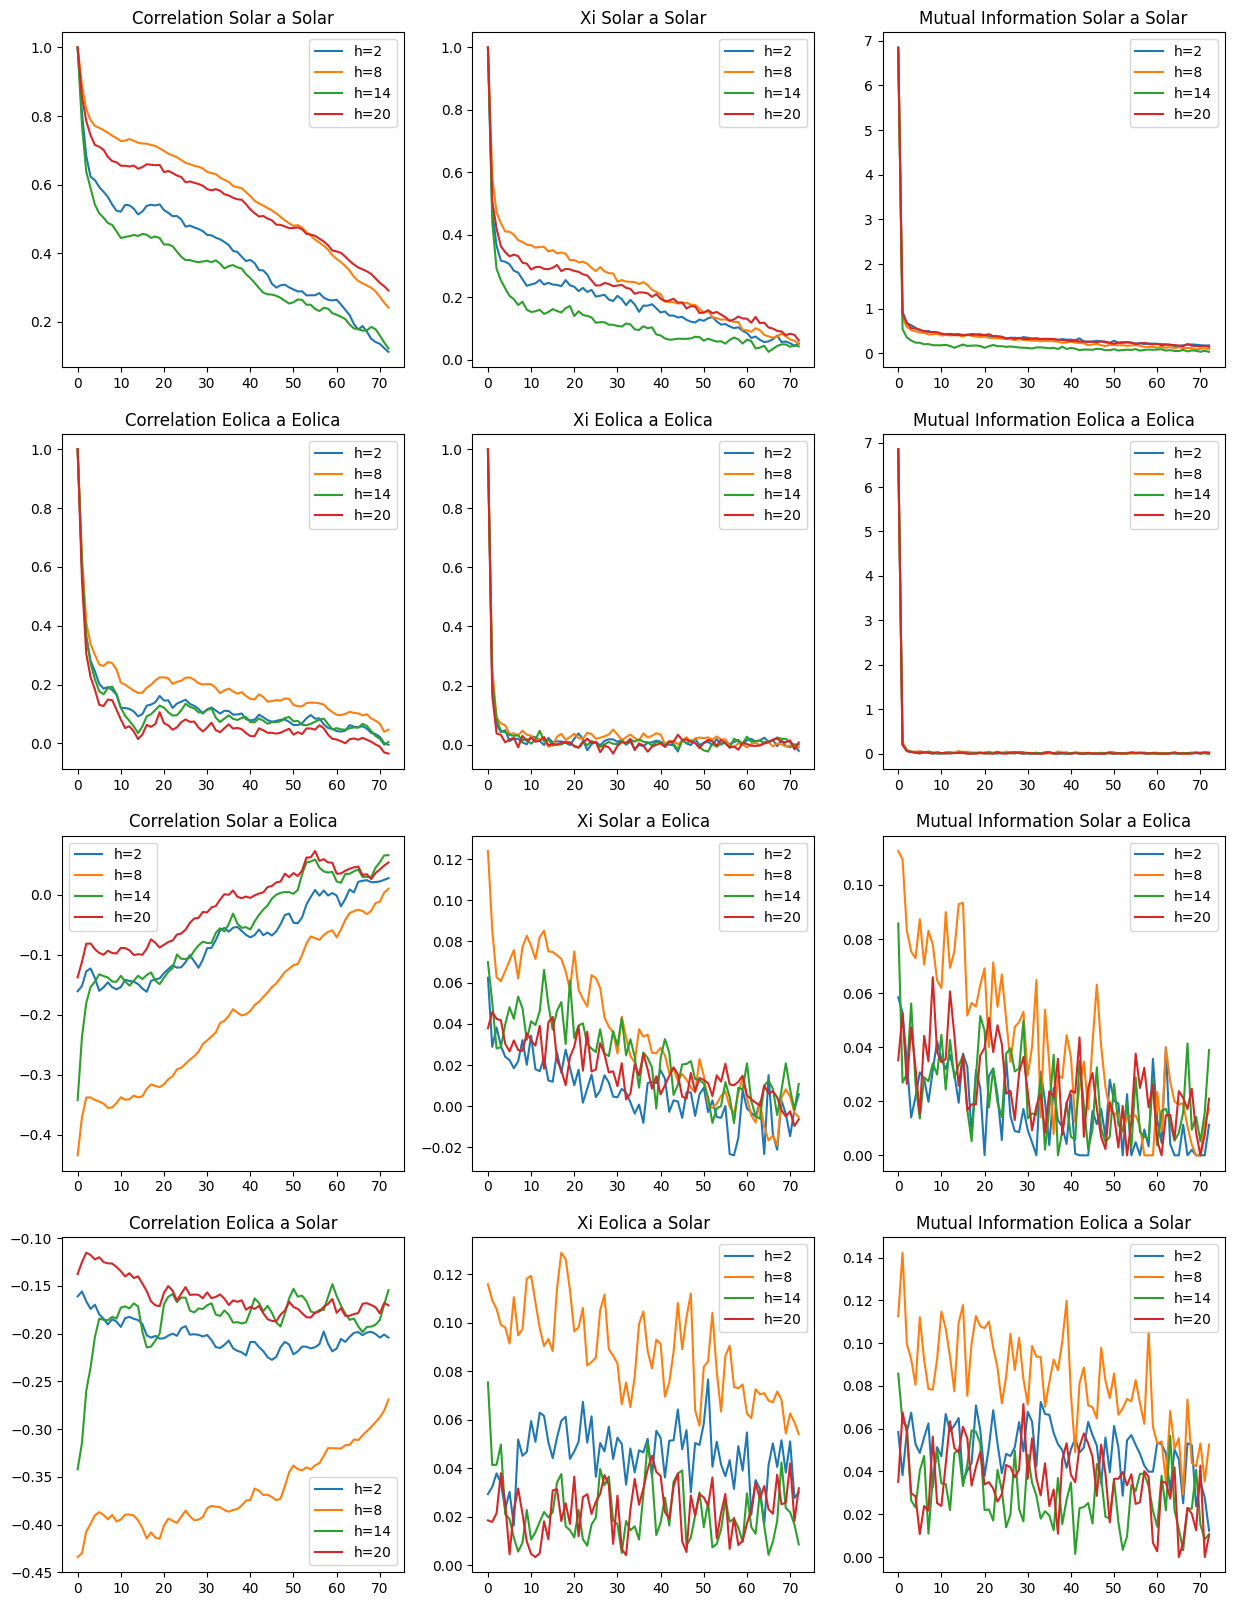

In [30]:
data = { # REducir 14 días de lag
    'Solar a Solar':solar2solar,
    'Eolica a Eolica':eolica2eolica,
    'Solar a Eolica':solar2eolica,
    'Eolica a Solar':eolica2solar,
}
metrics=['Correlation','Xi','Mutual Information']
hours = [2,8,14,20]
SIDE=5
fig, ax = plt.subplots(len(data.keys()),len(metrics))
fig.set_figwidth(SIDE*len(metrics))
fig.set_figheight(SIDE*len(data.keys()))
for m in range(len(metrics)):
    for i,k in enumerate(data.keys()):
        legend=[]
        for h in hours:
            ax[i][m].plot(data[k][h][m])
            legend.append(f'h={h}')
        ax[i][m].legend(legend)
        title = f'{metrics[m]} {k}'
        ax[i][m].set_title(title)
plt.show()

## Monthly correlation

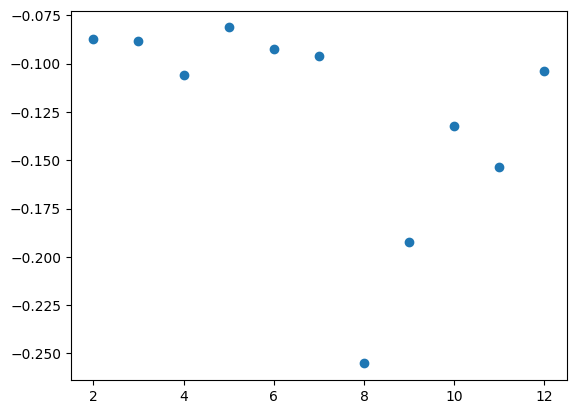

In [41]:
corrs = []
for i in range(12):
     s1 = s_solar[s_solar.index.month==i]
     s2 = s_eolica[s_eolica.index.month==i]
     corrs.append(s1.corr(s2))

plt.scatter(list(range(1,12+1)),corrs)

In [31]:
def calc_lcf(series_org, series_lag, n_lags=24*3, month=0):
    assert len(series_org) == len(series_lag)
    series_org = series_org[series_org.index.month==month]
    series_lag = series_lag[series_lag.index.month==month]
    rhos = []
    xis = []
    mis = []
    for lag in range(n_lags + 1):
        shifted_series = series_lag.shift(lag)
        rho = series_org.corr(shifted_series)
        df = pd.DataFrame({'x':shifted_series, 'y':series_org})
        df = df.dropna()
        xi = new_corr_coef(df)
        mi = mutual_info_regression(df[['x']], df['y'])
        rhos.append(rho)
        xis.append(xi)
        mis.append(mi)
    return rhos, xis, mis


solar2solar = []
solar2eolica = []
eolica2eolica = []
eolica2solar = []
for i in range(1,12+1):
    solar2solar.append(calc_lcf(s_solar, s_solar, month=i))
    solar2eolica.append(calc_lcf(s_solar, s_eolica, month=i))
    eolica2eolica.append(calc_lcf(s_eolica, s_eolica, month=i))
    eolica2solar.append(calc_lcf(s_eolica, s_solar, month=i))

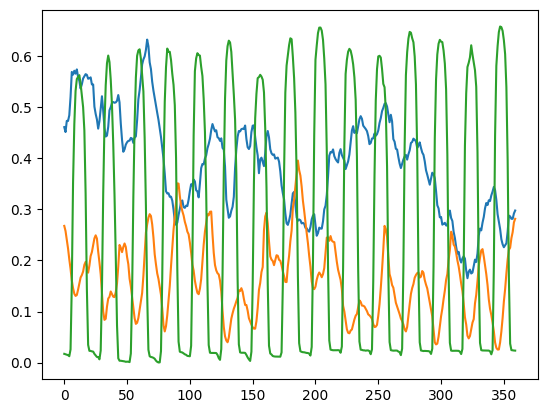

In [41]:
s_eolica = read_dataset(data='eolica')
s_solar = read_dataset(data='solar')

s = s_eolica[s_eolica.index.month==1]
plt.plot(s[-30*12:].to_numpy())
s = s_eolica[s_eolica.index.month==7]
plt.plot(s[-30*12:].to_numpy())
s = s_solar[s_solar.index.month==7]
plt.plot(s[-30*12:].to_numpy())

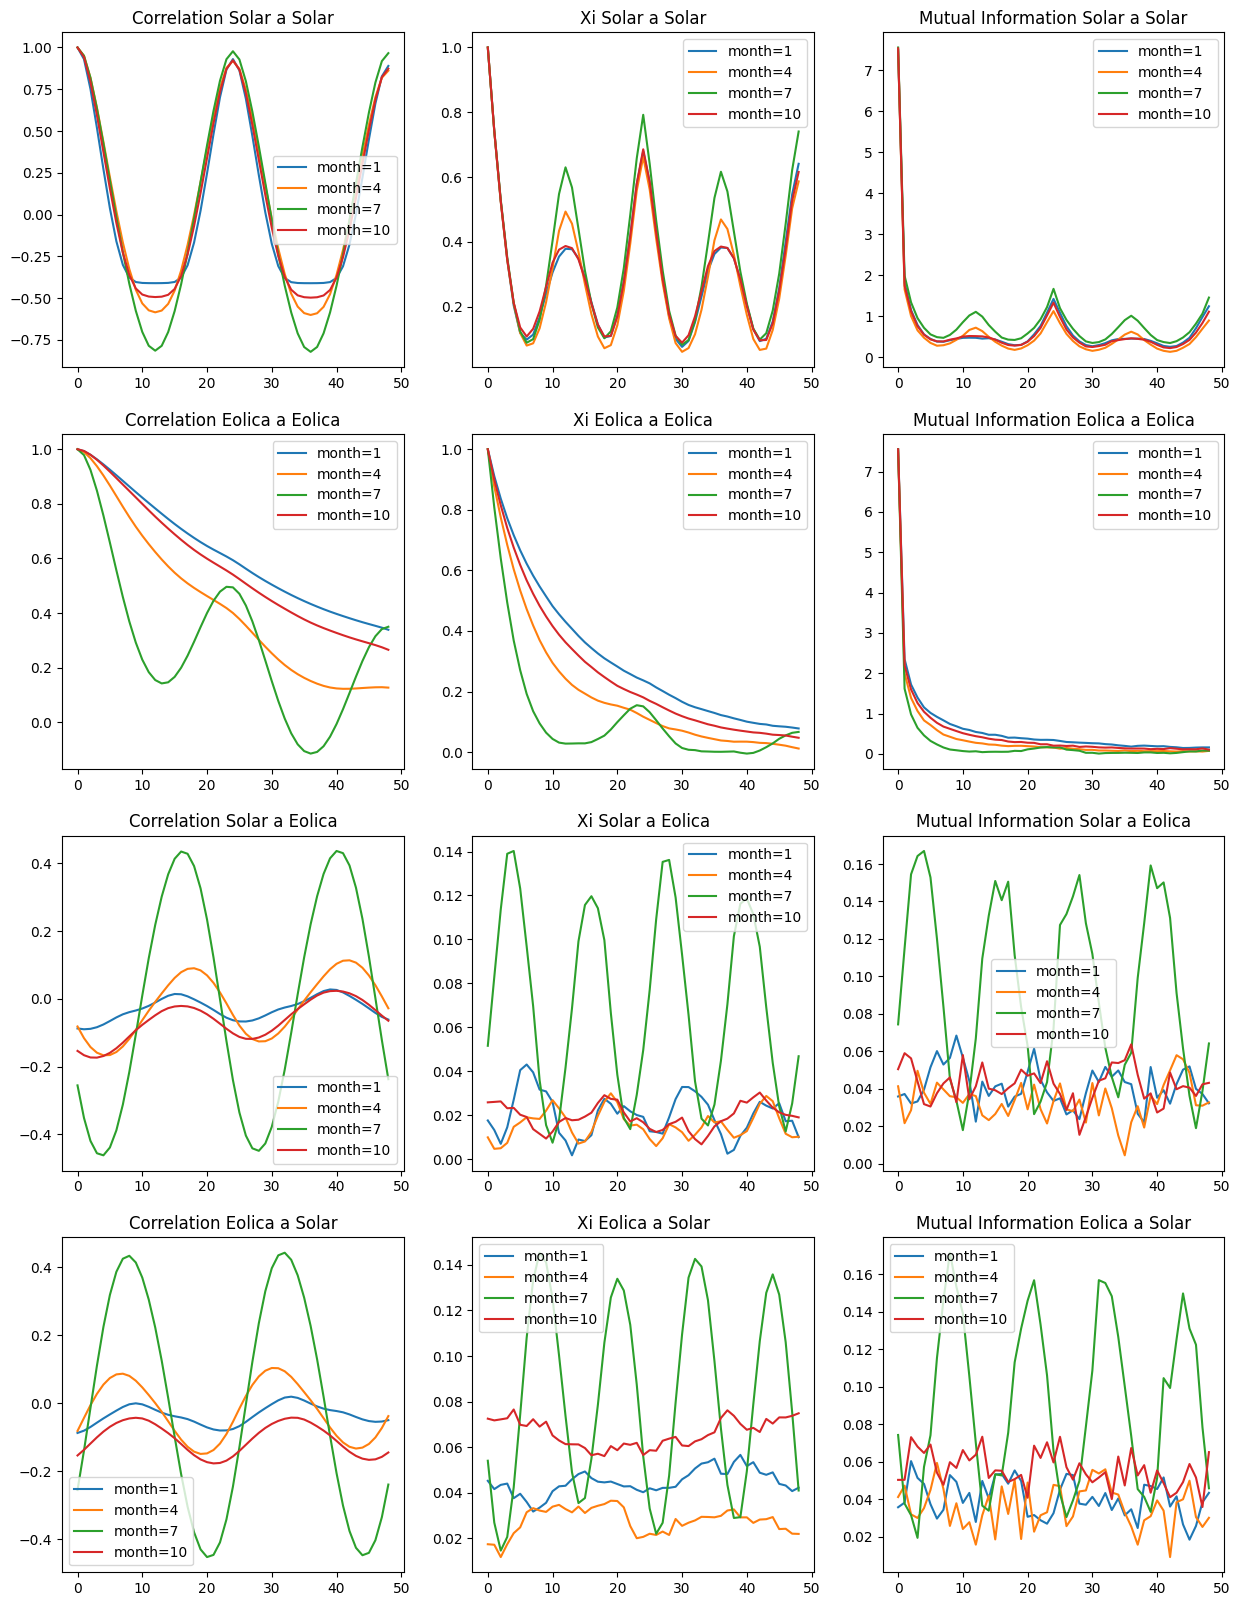

In [33]:
data = {
    'Solar a Solar':solar2solar,
    'Eolica a Eolica':eolica2eolica,
    'Solar a Eolica':solar2eolica,
    'Eolica a Solar':eolica2solar,
}
metrics=['Correlation','Xi','Mutual Information']
months = [1,4,7,10]
SIDE=5
fig, ax = plt.subplots(len(data.keys()),len(metrics))
fig.set_figwidth(SIDE*len(metrics))
fig.set_figheight(SIDE*len(data.keys()))
for m in range(len(metrics)):
    for i,k in enumerate(data.keys()):
        legend=[]
        for h in months:
            ax[i][m].plot(data[k][h-1][m])
            legend.append(f'month={h}')
        ax[i][m].legend(legend)
        title = f'{metrics[m]} {k}'
        ax[i][m].set_title(title)
plt.show()

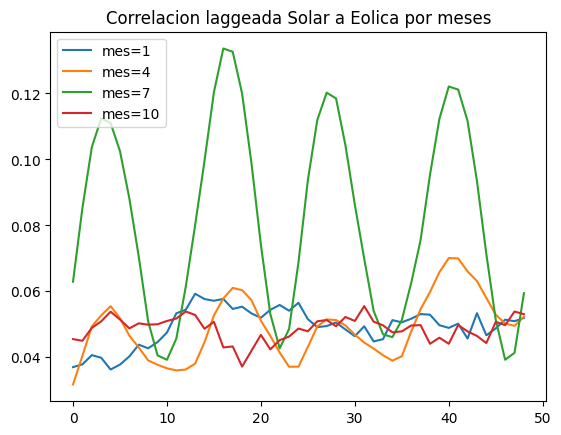

In [26]:
legend = []
hours = [1,4,7,10]
for i in hours:
    plt.plot(solar2eolica[i])
    legend.append(f'mes={i}')
plt.title('Correlacion laggeada Solar a Eolica por meses')
plt.legend(legend)

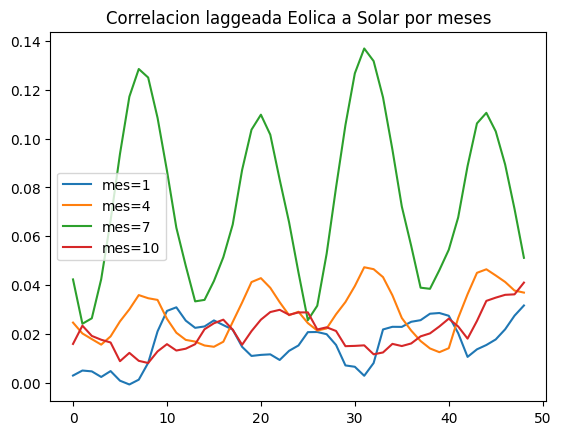

In [27]:
legend = []
hours = [1,4,7,10]
for i in hours:
    plt.plot(eolica2solar[i])
    legend.append(f'mes={i}')
plt.title('Correlacion laggeada Eolica a Solar por meses')
plt.legend(legend)